In [1]:
import sys, os, time, shutil, random
# os.environ['PLETHORA_PATH'] = r'C:\Users\anwan\Documents\workspace\local_data'
from pathlib import Path
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(linewidth=120)
import pickle
from tabulate import tabulate
from tqdm.notebook import tqdm
import torch
from torch import nn, optim as opt
import torch.nn.functional as F
import torch.distributions as distrib
from torch.utils.data import Dataset, DataLoader, TensorDataset

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# from src.helix import helix_labels, helix_observations, ToyVAE
from src.shapes import ShapesVAE, Shapes3D

import omnifig as fig

from omnilearn import util

In [3]:
device = 'cpu'

In [4]:
model = ShapesVAE()
model.load_state_dict(torch.load('model_a.pt'))
model.to(device)

ShapesVAE(
  (encoder): Sequential(
    (0): ConvBlock(
      (conv): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
      (nonlin): ELU(alpha=1.0)
    )
    (1): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
      (nonlin): ELU(alpha=1.0)
    )
    (2): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
      (nonlin): ELU(alpha=1.0)
    )
    (3): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (pool): MaxPool2

In [4]:
# from plethora import datasets
# dataset = datasets.Shapes3D(download=False, mode=None).prepare()
# len(dataset)

In [8]:
# data = Shapes3D(download=False, root=r'C:\Users\anwan\Documents\workspace\local_data\3dshapes')
data = Shapes3D(download=False, root=r'C:\Users\anwan\Documents\workspace\datasets\3dshapes')
# data = Shapes3D(download=False, root='/is/ei/fleeb/workspace/local_data/3dshapes')
# data = Shapes3D(download=False)

In [9]:
X, _ = data[torch.randint(len(data), size=(10000,))]
X.shape

torch.Size([10000, 3, 64, 64])

In [11]:
loader = DataLoader(TensorDataset(X), batch_size=100)
Zmu, Zsigma = [], []
for x, in tqdm(loader, total=len(loader)):
    with torch.no_grad():
        z = model.encode(x.to(device))
#         Zmu, Zsigma = Z.loc.cpu(), Z.scale.cpu()
        Zmu.append(z.loc.cpu())
        Zsigma.append(z.scale.cpu())
Zmu = torch.cat(Zmu)
Zsigma = torch.cat(Zsigma)
Zmu.shape

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\anwan\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([10000, 24])

In [12]:
# plt.figure()
# plt.title('Posterior')
# plt.xlabel(f'Dimension {ix}')
# plt.ylabel(f'Dimension {iy}')
# plt.xlim(xvals.min(),xvals.max(),)
# plt.ylim(yvals.min(),yvals.max())
# # plt.imshow(mags, extent=[xvals.min(),xvals.max(),yvals.min(),yvals.max()], aspect=aspect_ratio);
# badsel = np.ones((*happy.shape,4))
# badsel[...,-1] = 0.
# badsel[~happy] = [1,0,0,1]
# plt.imshow(badsel, #np.stack([happy, np.ones_like(happy), np.ones_like(happy), ], -1)*255,
# #            cmap='Reds', alpha=0.8, 
#            extent=[xvals.min(),xvals.max(),yvals.min(),yvals.max()], aspect=aspect_ratio)
# # plt.imshow(mags);
# plt.tight_layout()


In [13]:
import numpy as np
from scipy.linalg import qr

np.random.seed(11)

n = 24
H = np.random.randn(n, n)
Q, R = qr(H)
basis = torch.as_tensor(Q).float()
basis.shape

torch.Size([24, 24])

In [14]:
# util.plot_mat(Q@Q.T, val_fmt=2)

In [15]:
rZmu = Zmu @ basis
rZsigma = Zsigma @ basis
rZmu.shape

torch.Size([10000, 24])

In [23]:
dims = 13, 14
dims = 16, 22
# dims = 15, 23
dims = 2, 9
dims

(2, 9)

In [24]:
r = 2
xlims = -r, r
ylims = -r, r

aspect_ratio = 'auto'
aspect_ratio = 'equal'

In [25]:
# zs = Z.sample((10,)).cpu()[...,dims].view(-1,len(dims))
# zs.shape
# plt.figure()
# sns.kdeplot(x=zs[...,0], y=zs[...,1], cmap="Reds", shade=True, bw_adjust=.2)
# n = 60
# plt.figure()
# hist, *other = np.histogram2d(*zs.t().numpy(), bins=n, normed=True, range=torch.as_tensor([xlims, ylims]).cpu().numpy())
# plt.imshow(hist.T[::-1], cmap='Blues', interpolation = "gaussian", 
#            extent=[*xlims, *ylims], aspect=aspect_ratio)

<IPython.core.display.Javascript object>


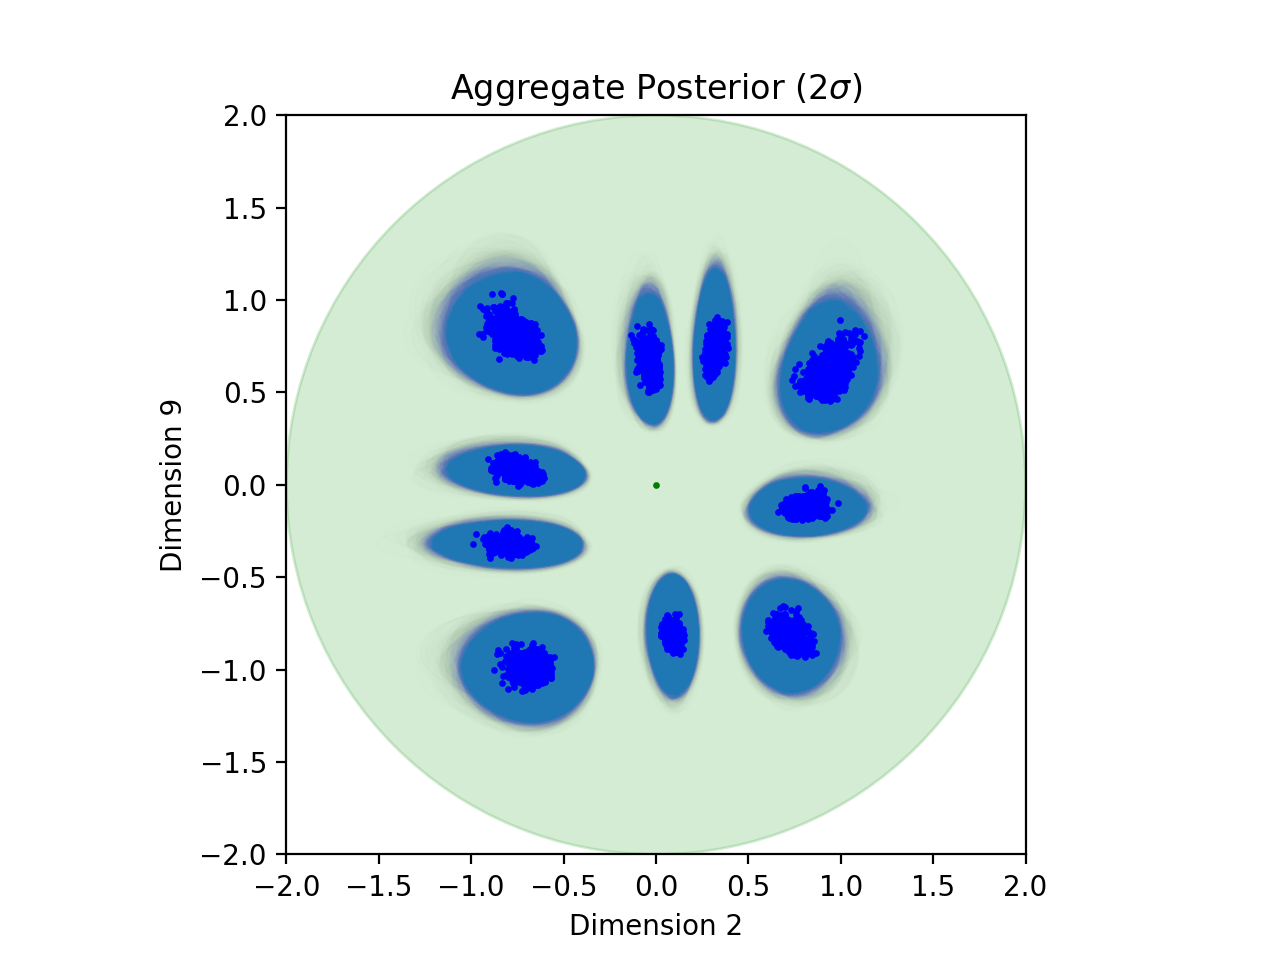

In [26]:

plt.figure()
plt.gca().set_aspect(aspect_ratio)

conf = 2

locs = Zmu[...,dims]
widths = Zsigma[...,dims]*conf*2

# locs = rZmu[...,dims]
# widths = rZsigma[...,dims]*conf*2


# Qlbls = ms.predict(locs.numpy())
alpha = max(10/len(locs), 0.005)
for c, s in zip(locs, widths):
    e = mpatches.Ellipse(c, *s, alpha=alpha, color='C0')#color=colors[l])
    plt.gca().add_artist(e)
plt.scatter(*locs.t(), marker='o', color='b', s=2, zorder=2)
# plt.scatter(*zs.t(), marker='.', color='C0', s=1, zorder=2)
plt.title(f'Aggregate Posterior (${conf}\\sigma$)')

plt.scatter(0,0, marker='o', color='g', s=2, zorder=2)
e = mpatches.Ellipse((0,0), 2*conf,2*conf, alpha=0.2, color='C2', zorder=-2)#color=colors[l])
plt.gca().add_artist(e)

plt.xlabel(f'Dimension {dims[0]}')
plt.ylabel(f'Dimension {dims[1]}')

plt.xlim(*xlims)
plt.ylim(*ylims);

In [ ]:
# root = ''